<a href="https://colab.research.google.com/github/yaroslavtsepkov/colab/blob/lab_0/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix multiplication
### CPU (numpy) VS GPU(cupy)


In [9]:
import numpy as np
import cupy as cp
import time
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
cp.cuda.Device()

<CUDA Device 0>

In [11]:
def genMatrix(n):
    return np.random.uniform(size=(n,n))

In [12]:
def cpuMult(n):
    size = []
    time_cpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = genMatrix(n)
        np.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_cpu.append(p-s)
    return size, time_cpu

In [13]:
def gpuMult(n):
    size = []
    time_gpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = cp.array(genMatrix(n))
        cp.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_gpu.append(p-s)
    return size, time_gpu

In [14]:
size_list_cpu, time_list_cpu = cpuMult(100)
size_list_gpu, time_list_gpu = gpuMult(100)
time_cpu = np.array(time_list_cpu)
time_gpu = np.array(time_list_gpu)

In [15]:
df = pd.DataFrame({
    'size_of_matrix': size_list_cpu,
    'time_for_CPU': time_cpu,
    'time_for_GPU': time_gpu,
    'boost': time_cpu / time_gpu
})
df

,size_of_matrix,time_for_CPU,time_for_GPU,boost
0,100,0.000459,0.000555,0.827601
1,150,0.000761,0.000552,1.377644
2,200,0.001468,0.000904,1.623517
3,250,0.003543,0.001255,2.823485
4,300,0.004357,0.001785,2.441224
5,350,0.004363,0.002272,1.919841
6,400,0.006604,0.003094,2.134304
7,450,0.014316,0.003417,4.189576
8,500,0.016155,0.004105,3.935014
9,550,0.015023,0.005770,2.603760


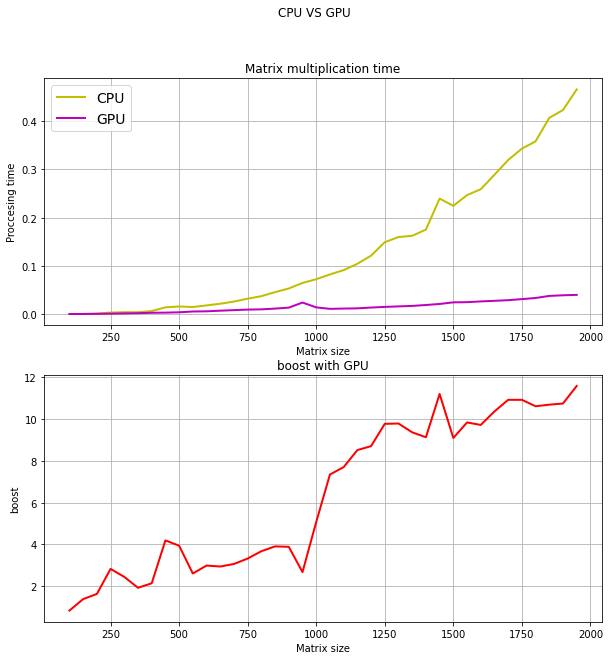

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
fig.suptitle('CPU VS GPU') 

ax1.plot(df.size_of_matrix, df.time_for_CPU, color='y', label = 'CPU', linewidth=2)
ax1.plot(df.size_of_matrix, df.time_for_GPU, color='m', label = 'GPU', linewidth=2)
ax1.legend(loc="upper left", fontsize=14)
ax1.set_xlabel('Matrix size')
ax1.set_ylabel('Proccesing time')
ax1.set_title('Matrix multiplication time')
ax1.grid()

ax2.plot(df.size_of_matrix, df.boost, color='r', linewidth=2)
ax2.set_xlabel('Matrix size')
ax2.set_ylabel('boost')
ax2.set_title('boost with GPU')
ax2.grid()

plt.show()